<a href="https://colab.research.google.com/github/EvelyneBomfim/Bootcamp_DIO-Unimed_BH/blob/main/Desafio_An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio - Loja

## Importando bibliotecas

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o conjunto de dados
Arquivo em Excel (xlsx)

In [ ]:
dados = pd.read_excel('AdventureWorks.xlsx')
dados.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
print('A base de dados possui {0} linhas e {1} colunas.'.format(dados.shape[0], dados.shape[1]))

A base de dados possui 904 linhas e 16 colunas.


In [ ]:
# Verificando quais os tipos de dados de cada coluna
dados.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [ ]:
# Verificando se existem dados faltantes no dataset
dados.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [ ]:
# Deletando as colunas 'ID Cliente' e 'No. Venda'
dados.drop(columns=['ID Cliente', 'No. Venda'], axis=1, inplace=True)

## Criando colunas

In [ ]:
dados['Custo Venda'] = dados['Custo Unitário']*dados['Quantidade']

In [ ]:
dados['Lucro Venda'] = dados['Valor Venda'] - dados['Custo Venda']

In [ ]:
dados['Tempo Envio'] = (dados['Data Envio'] - dados['Data Venda']).dt.days

In [ ]:
dados.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Venda,Lucro Venda,Tempo Envio
0,2008-05-09,2008-05-29,199,384,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5


## Correlação
Verificando a correlação entre as variáveis do dataset.

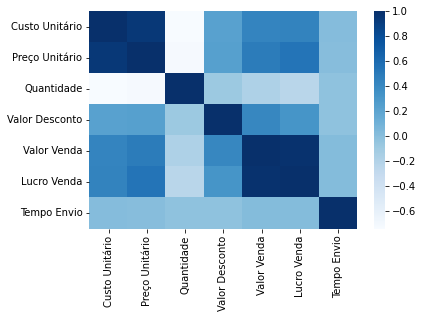

In [ ]:
correlacao = dados[['Custo Unitário',	'Preço Unitário',	'Quantidade',	'Valor Desconto',	'Valor Venda', 'Lucro Venda', 'Tempo Envio']]
mapa_calor = sns.heatmap(correlacao.corr(), cmap='Blues')

Vemos que existem algumas variáveis com a relação:
- O preço unitário tem correlação com o custo unitário (até para obter lucro na venda dos produtos).
- A quantidade é mostrada como inversamente proporcional ao preço e custo (quanto mais caro, menos é comprado).

## Análise dos dados

In [ ]:
dados.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


### Quais produtos mais vendidos?

In [ ]:
mais_vendidos = dados['Quantidade'].groupby(dados['Produto']).sum().sort_values(ascending=False)
mais_vendidos

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

### Quais produtos geram mais lucro?

In [ ]:
mais_lucro = dados.groupby(dados['Produto'])['Lucro Venda'].sum().sort_values(ascending=False)
mais_lucro.round(2)

Produto
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          608098.97
Fabrikam Trendsetter 2/3'' 17mm X100 Black         520733.86
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black        507214.23
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey         501926.50
Fabrikam Trendsetter 1/3'' 8.5mm X200 White        453138.34
Adventure Works Laptop15.4W M1548 Black            367185.56
Adventure Works Laptop15.4W M1548 Red              344850.68
Headphone Adapter for Contoso Phone E130 Silver     98160.50
Headphone Adapter for Contoso Phone E130 White      96514.45
Name: Lucro Venda, dtype: float64

Vemos que os produtos mais vendidos são os Headphones, mas por serem os produtos mais baratos são os que dão menos lucro.

Os produtos que geram mais lucro são da fabricante Fabrikam.

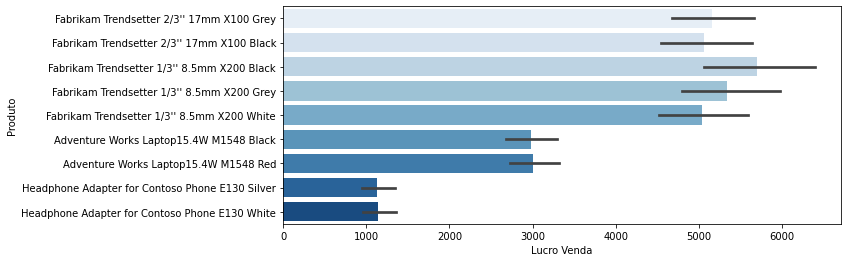

In [ ]:
plt.subplots(figsize=(10, 4))
sns.barplot(x='Lucro Venda', y='Produto', data=dados, order=mais_lucro.index, palette='Blues')

Lucro obtido em 2008 e 2009

Text(0.5, 1.0, 'Lucro mensal em 2008 e 2009')

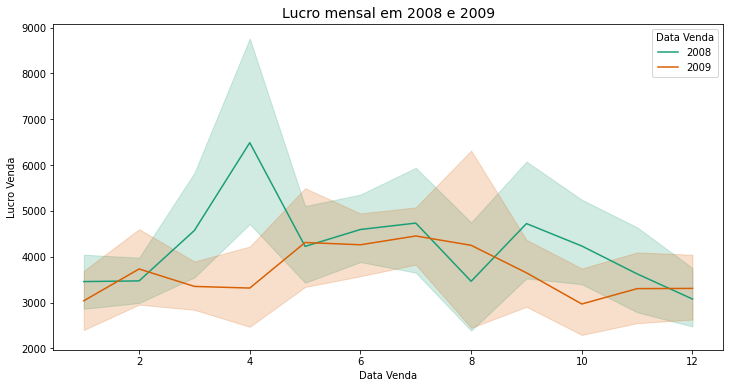

In [ ]:
plt.subplots(figsize=(12, 6))
sns.lineplot(x=(dados['Data Venda'].dt.month), y='Lucro Venda', data=dados, hue=(dados['Data Venda'].dt.year), palette='Dark2')
plt.title('Lucro mensal em 2008 e 2009', fontsize=14)

Vemos que houve um lucro maior no começo do 3° trimestre de 2008.

### Qual loja possui um lucro maior ?

In [ ]:
loja_lucro = dados.groupby('ID Loja')['Lucro Venda'].sum().sort_values(ascending=False).reset_index()
loja_lucro.round(2)

TypeError: ignored

Text(0, 0.5, 'Lucro em R$')

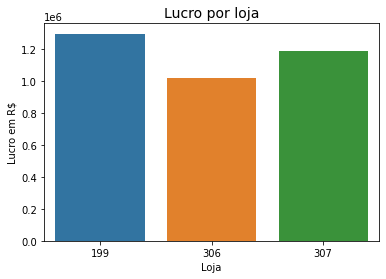

In [ ]:
sns.barplot(x='ID Loja', y='Lucro Venda', data=loja_lucro)
plt.title('Lucro por loja', fontsize=14)
plt.xlabel('Loja')
plt.ylabel('Lucro em R$')

### Qual fabricante vende mais produtos?

In [ ]:
vendidos_fabricante = dados.groupby('Fabricante')['Quantidade'].sum().sort_values(ascending=False)
vendidos_fabricante

Fabricante
Contoso, Ltd       50240
Fabrikam, Inc.      4531
Adventure Works     2136
Name: Quantidade, dtype: int64

### Qual classe vende mais?

In [ ]:
classe_qtd = dados.groupby('Classe')['Quantidade'].count().reset_index()
classe_qtd

,Classe,Quantidade
0,Economy,172
1,Regular,732


Text(0.5, 1.0, 'Classe dos produtos mais vendidos')

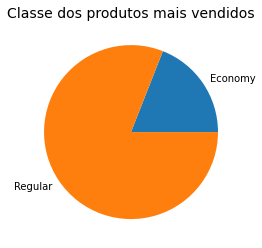

In [ ]:
plt.pie(classe_qtd['Quantidade'], labels=classe_qtd['Classe']);
plt.title('Classe dos produtos mais vendidos', fontsize=14)

A classe Regular vende 4x mais que a Economy.

Seria interessante verificar o que é Economy, se é uma versão mais barata dos produtos ou promoções.

In [ ]:
vendas_classe = dados[['Custo Unitário','Preço Unitário','Quantidade','Valor Desconto','Valor Venda','Lucro Venda']].groupby(dados['Classe']).sum()
vendas_classe.round(2)

,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Lucro Venda
Classe,,,,,,
Economy,875.48,1718.28,50240,51501.05,450396.55,194674.95
Regular,245018.08,669527.00,6667,571466.41,5534209.59,3303148.14


Text(0.5, 0, 'Tempo de envio (em dias)')

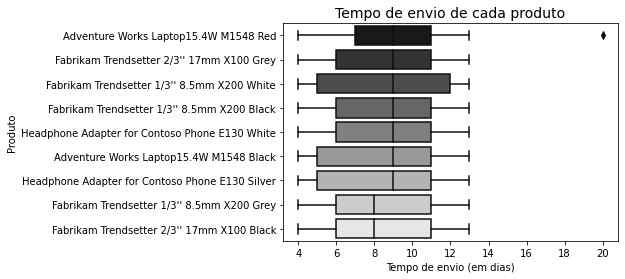

In [ ]:
ordem = dados.groupby(['Produto'])['Tempo Envio'].mean().sort_values(ascending=False).index

sns.boxplot(x='Tempo Envio', y='Produto', data=dados, order=ordem, palette='gray')
plt.title('Tempo de envio de cada produto', fontsize=14)
plt.xlabel('Tempo de envio (em dias)')

O tempo de envio de cada produto é muito semelhante. No gráfico, vemos que o tempo mínimo são 4 dias e o máximo 13 dias.

A maioria dos produtos possuem a mediana de 9 dias para o envio.

Percebemos que já um outlier de 20 dias no produto Adventure Words Laptop Red.


In [ ]:
dados[dados['Tempo Envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Venda,Lucro Venda,Tempo Envio
0,2008-05-09,2008-05-29,199,384,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


Por haver apenas um caso assim, provavelmente foi um erro ou problema durante o procedimento. 

Seria necessário verificar com o setor responsável o que houve para descartar este registro da análise ou tomar decisões considerando o ocorrido.

## Exportando os arquivos gerados

### Exportando o conjunto de dados em CSV

In [ ]:
dados.to_csv('AdventureWorks_novo.csv', index=False)